In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
Data = pd.read_csv('venv\Scripts\Data Structures\Data Anaylsis\customer_churn_dataset-testing-master.csv')
Data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shaq6\AppData\Local\Temp\ipykernel_3636\2616600039.py:1: SyntaxWarning: invalid escape sequence '\S'
  Data = pd.read_csv('venv\Scripts\Data Structures\Data Anaylsis\customer_churn_dataset-testing-master.csv')


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
elements = ['Gender','Subscription Type','Contract Length']
for elem in elements :
  Data[elem] = encoder.fit_transform(Data[elem])

<Axes: ylabel='Total Spend'>

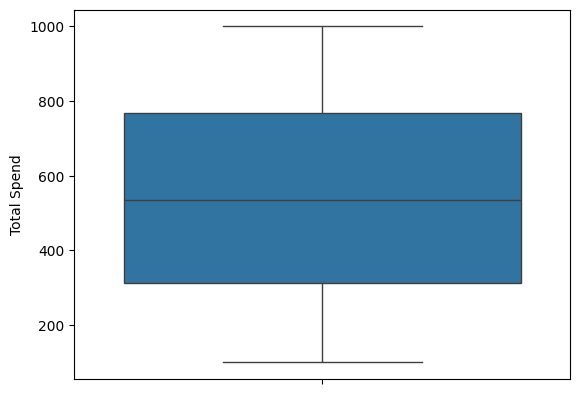

In [21]:
sns.boxplot(Data['Total Spend'])

Numerical Features ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']
Categorical Features []


<Axes: >

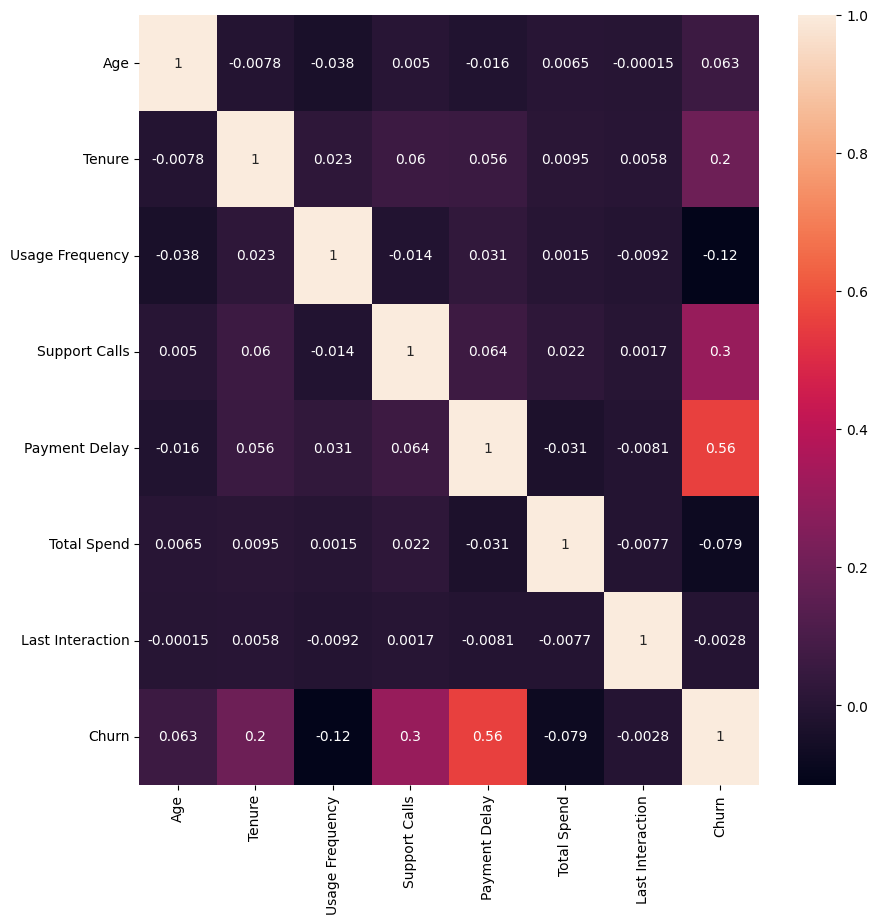

In [25]:
numeric_Features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
CategoricalFeatures = [feature for feature in Data.columns if Data[feature].dtype == 'O']
print(f"Numerical Features {numeric_Features}")
print(f"Categorical Features {CategoricalFeatures}")
numericFeatureData = Data.drop(Data[['Gender','Subscription Type','Contract Length']],axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(numericFeatureData.corr(),annot=True)

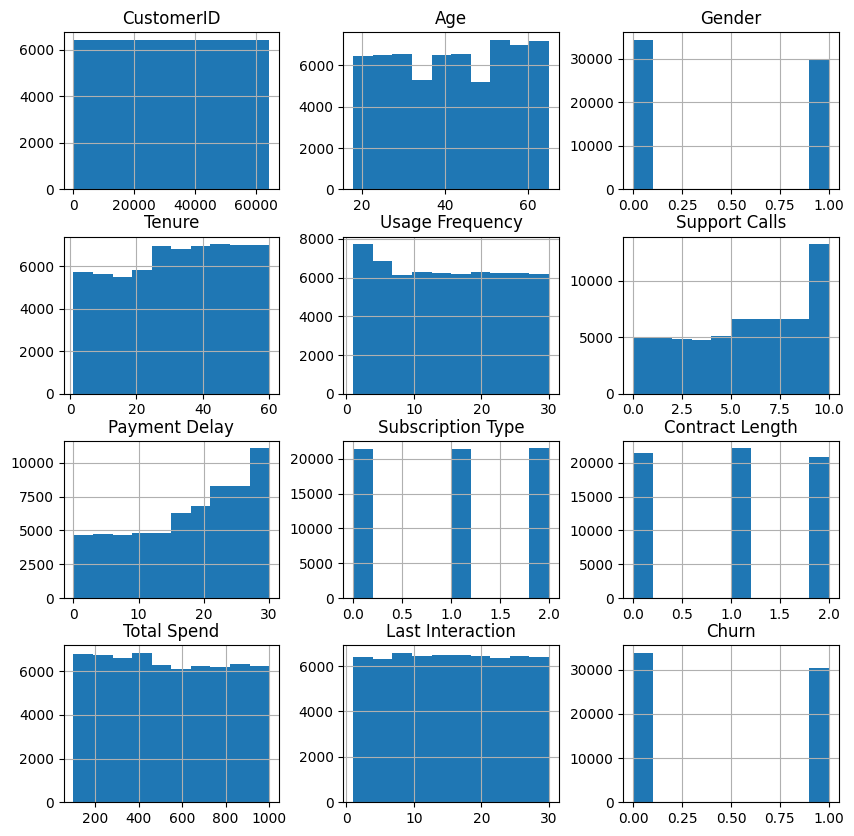

In [7]:
Data.hist(figsize=(10,10))
plt.show()

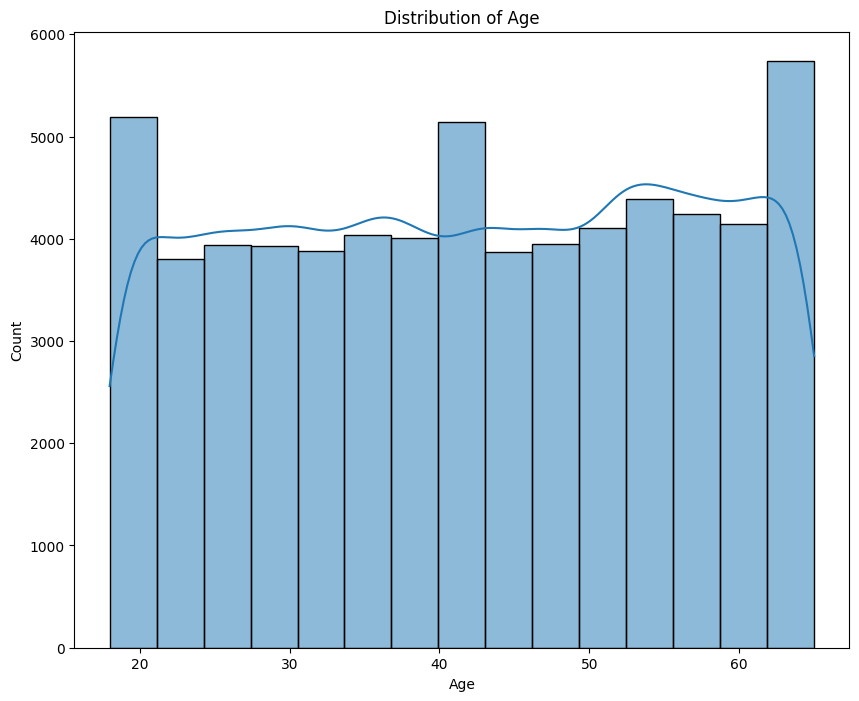

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(x='Age',data=Data,kde=True,bins=15)
plt.title("Distribution of Age")
plt.show()

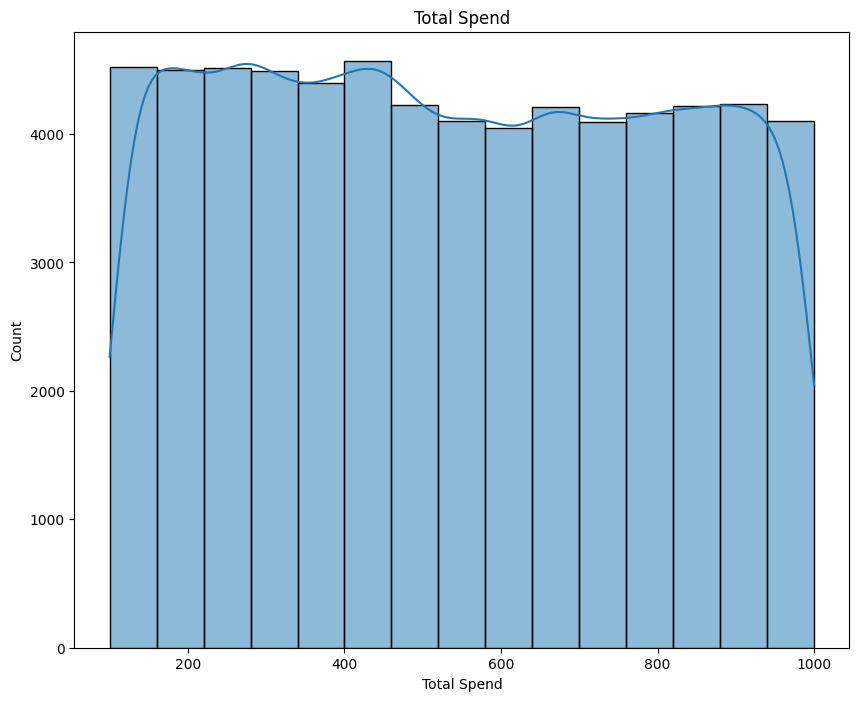

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(x='Total Spend',data=Data,kde=True,bins=15)
plt.title("Total Spend")
plt.show()


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


In [11]:
Data.drop(columns=['CustomerID'],inplace=True)

In [12]:
Data.isnull().sum().sum()

np.int64(0)

In [13]:
Data.dropna(inplace=True)

In [14]:
Data.duplicated().sum()

np.int64(0)

In [15]:
x = Data.drop(columns=['Churn'],axis=1)
y = Data['Churn']

In [16]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

Model = LogisticRegressionCV()
Model.fit(x_train,y_train)

c:\Users\shaq6\.anaconda\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shaq6\.anaconda\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LogisticRegressionCV()

In [18]:
y_pred = Model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"""The Accuracy : {accuracy * 100:.2f}%""")

The Accuracy : 82.81%
